In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Bestseller_Books.csv')

##### Variables Description:

- Name (object): The title of the book.  
- Author (object): The author of the book.  
- User Rating (float64): The average rating given by users, ranging from 4.05 to 4.9. This provides an insight into how well-received the book is by readers.  
- Reviews (float64): The number of reviews for each book. This can be used to gauge the popularity and reader engagement with the book.  
- Price (float64): The price of the book, which varies from 0 to 29.5.  
- Year (float64): The year the book was published. The range is from 2009 to 2019.  
- Genre (object): The genre of the book, which includes categories like "Fiction" and "Non Fiction."  

#### Dataset Overview:
Shows the shape, columns, data types, and summary statistics of the dataset.

In [3]:
# Dataset Overview
def dataset_overview(data):
    print("Dataset Overview:\n")
    print("Shape of dataset:", data.shape)
    print("\nColumns and data types:\n", data.dtypes)
    print("\nFirst few rows:\n", data.head())
    print("\nSummary statistics:\n", data.describe())

##### Handling Missing Values:
Identifies missing values in each column.  
Fills missing numerical values with the median and categorical values with the mode.

In [4]:
# 1. Missing Values
missing_values = data.isnull().sum()
print("\nMissing values per column:\n", missing_values)

for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col].fillna(data[col].median())
    else:
        data[col].fillna(data[col].mode()[0])

print("\nMissing values after cleaning:\n", data.isnull().sum())


Missing values per column:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Missing values after cleaning:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


##### Handling Outliers:
Detects outliers using the Interquartile Range (IQR) method.  
Caps outliers to the lower and upper bounds to reduce their influence.  

In [5]:
# 2. Outliers
outliers = {}
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

print("\nOutliers detected:\n")
for col, outlier_data in outliers.items():
    print(f"Column before cleaning: {col}, Number of outliers: {len(outlier_data)}")

for col in outliers:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


Outliers detected:

Column before cleaning: User Rating, Number of outliers: 21
Column before cleaning: Reviews, Number of outliers: 17
Column before cleaning: Price, Number of outliers: 31
Column before cleaning: Year, Number of outliers: 0


##### Handling Duplicates:
Counts duplicate rows and removes them.

In [6]:
# 3. Duplicates
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

data = data.drop_duplicates()

print("\nNumber of duplicate rows after cleaning:", data.duplicated().sum())


Number of duplicate rows: 0

Number of duplicate rows after cleaning: 0


In [7]:
dataset_overview(data)

Dataset Overview:

Shape of dataset: (550, 7)

Columns and data types:
 Name            object
Author          object
User Rating    float64
Reviews        float64
Price          float64
Year           float64
Genre           object
dtype: object

First few rows:
                                                 Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price    Year        Genre  
0                  JJ Smith          4.7  17350.0    8.0  2016.0  Non Fiction  
1              Stephen King          4.6   2052.0   22.0  2011.0      Fiction  
2        Jordan B. Peterson          4.7  18979.0   15.0  2018.0  Non Fiction  
3             George Orwell          4.7  21424.0    6.0  2017.0      Fiction 

### Dataset Quality Issues
1. Price of 0: The dataset contains books priced at 0, which may be a data entry issue or might indicate free books. It’s important to investigate these records to understand their significance.
2. Outliers in Reviews: The number of reviews has a wide range, with some books having as few as 37 reviews and others having over 37,000. This could suggest that the dataset includes books with varying levels of popularity, and a few extreme cases may need further analysis.
3. Year Data Type: The Year column is represented as a float, which may not be ideal since years are categorical and integer values. This could lead to issues with analysis and plotting. Converting the year column to an integer type would be more appropriate.

#### Visualization

##### 1. How have average book prices changed over the years?

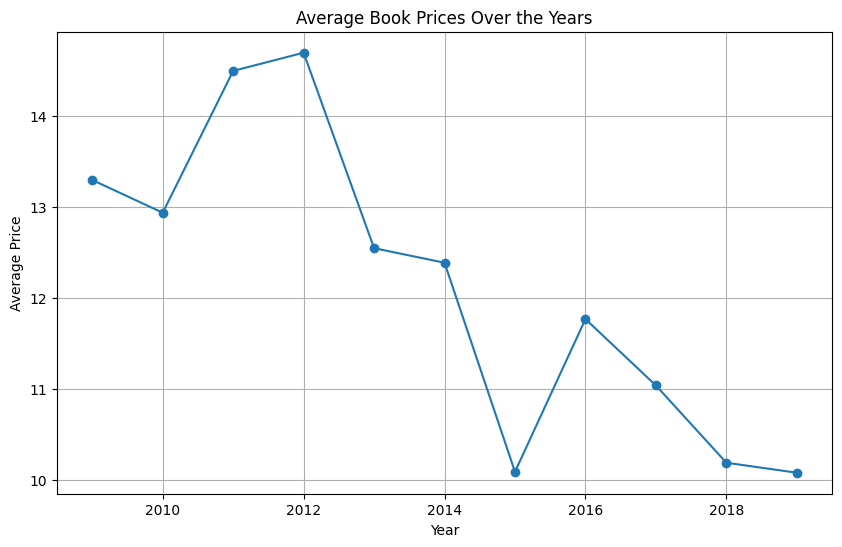

In [8]:
avg_price_per_year = data.groupby('Year')['Price'].mean()
plt.figure(figsize=(10, 6))
avg_price_per_year.plot(kind='line', marker='o')
plt.title('Average Book Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid()
plt.show()

Average book prices have shown notable fluctuations over the years. The significant drop in 2015, followed by a slight rebound in 2016, highlights potential shifts in market dynamics, consumer demand, or publishing strategies. These trends suggest that pricing strategies should not only consider historical data but also analyze underlying factors such as economic conditions, production costs, and competitive pressures that may have influenced these changes.

##### 2. Do Fiction or Non-Fiction books have higher average ratings?

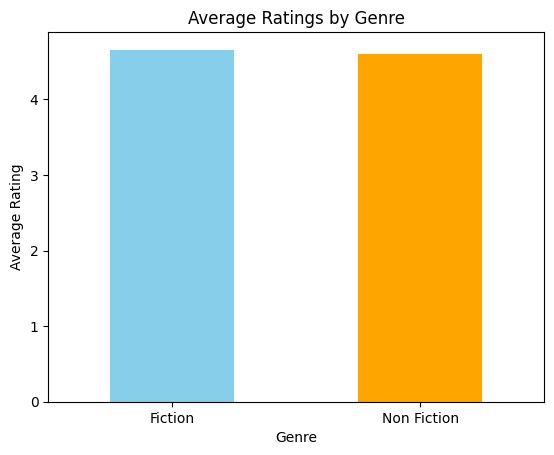

In [9]:
avg_rating_by_genre = data.groupby('Genre')['User Rating'].mean()
avg_rating_by_genre.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

The plot indicates that there is only a slight difference in average user ratings between Fiction (4.66) and Non-Fiction (4.60). This suggests that both genres are similarly well-received by readers, highlighting their comparable popularity. Publishers might consider focusing on both genres equally when targeting diverse reader preferences.

##### 3. Which authors have the most bestseller books?

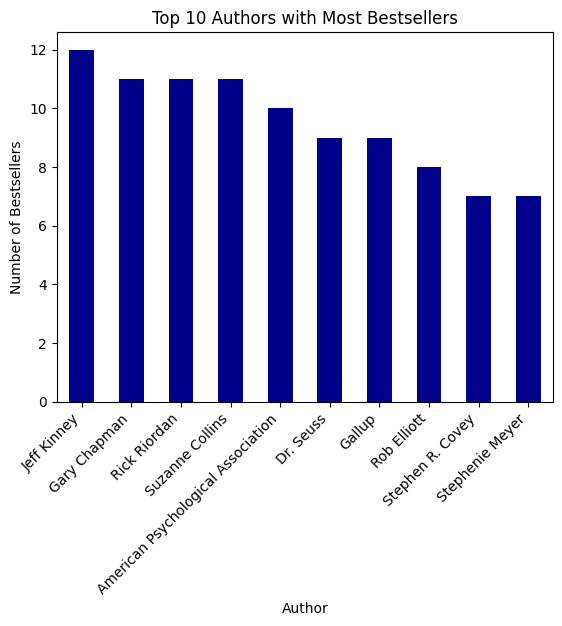

In [10]:
most_bestsellers = data['Author'].value_counts().head(10)
most_bestsellers.plot(kind='bar', color='darkblue')
plt.title('Top 10 Authors with Most Bestsellers')
plt.xlabel('Author')
plt.ylabel('Number of Bestsellers')
plt.xticks(rotation=45, ha='right')
plt.show()

This analysis highlights the top 10 authors with the most bestsellers, including Jeff Kinney, Gary Chapman, and Rick Riordan. By examining the predominant genres of these authors' works, we can gain valuable insights into which genres resonate most with readers. This information can guide publishers in identifying trending genres and tailoring their marketing strategies to capitalize on popular themes.

##### 4. Is there a correlation between price and the number of reviews?

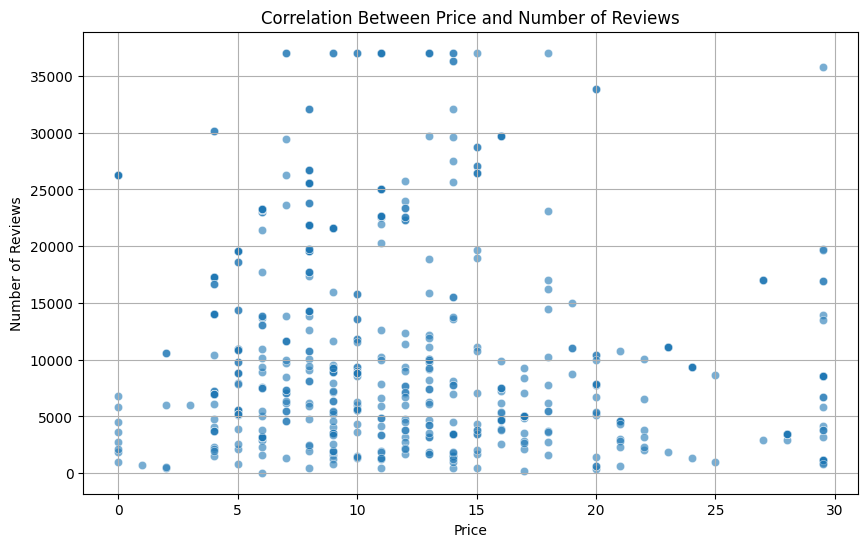

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Reviews', data=data, alpha=0.6)
plt.title('Correlation Between Price and Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid()
plt.show()

In [12]:
correlation = data['Price'].corr(data['Reviews'])
print("Correlation between Price and Reviews:", correlation)

Correlation between Price and Reviews: -0.13465547979056516


The weak negative correlation of -0.1347 between price and reviews suggests that price is not a major factor driving the number of reviews. This implies that pricing strategies should focus more on market conditions and perceived value rather than relying on price changes to influence review volume. Instead, factors such as product quality, author reputation, and effective marketing campaigns may play a more significant role in generating reviews. Marketing strategies should therefore target audience engagement, highlight the value of the product, and utilize promotional efforts beyond pricing adjustments to improve review trends and overall performance.

##### 5. What are the most common price ranges for bestseller books?

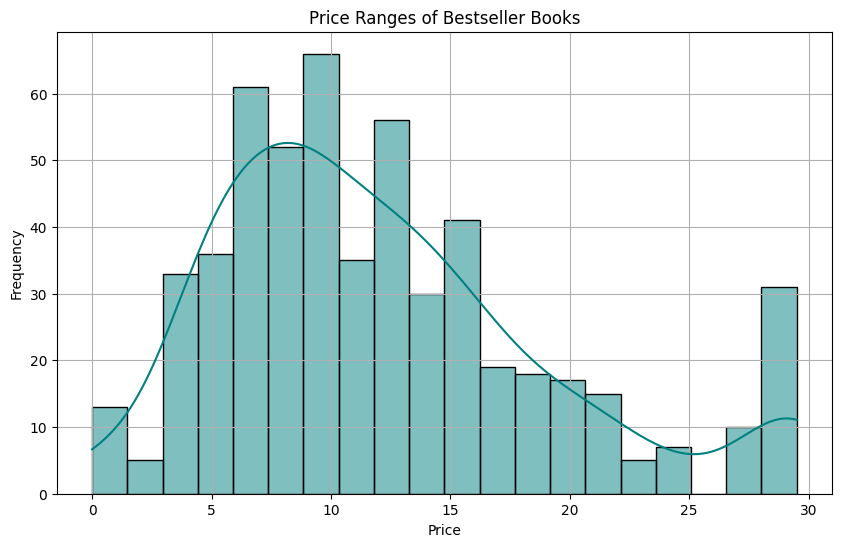

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=20, kde=True, color='teal')
plt.title('Price Ranges of Bestseller Books')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The price distribution exhibits right-skewness, with the majority of prices falling between 5 and 15. Most prices are clustered within this range, indicating that lower-priced items are more common. Prices above 15 are less frequent, showing a significant drop in occurrence as the price increases. This suggests that a large portion of products or services are priced within this moderate range, and prices above 15 tend to be outliers. This distribution could inform pricing strategies by indicating that customers are more likely to engage with products priced within this range.

##### 6. Distribution of Ratings

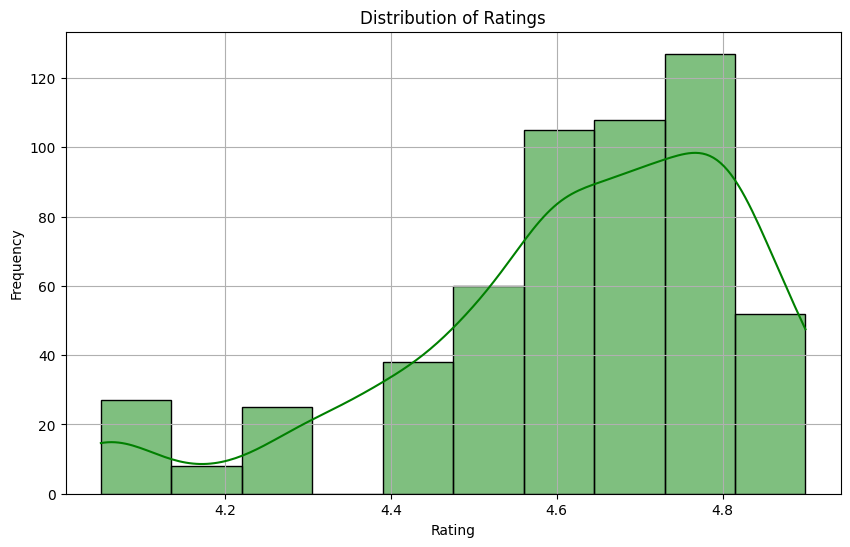

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['User Rating'], bins=10, kde=True, color='green')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The distribution of user ratings clearly shows left-skewness, with the majority of ratings clustered between 4.5 and 4.8. This indicates that most products or services receive high ratings, but there is a noticeable drop as ratings decrease. Publishers can use this information to adjust their content by focusing on the topics or genres that tend to receive lower ratings, potentially improving quality and targeting the preferences of their audience to boost overall ratings. Understanding the genres associated with lower ratings can guide decisions on content development to increase customer satisfaction.

##### 7. Genre Distribution by Year

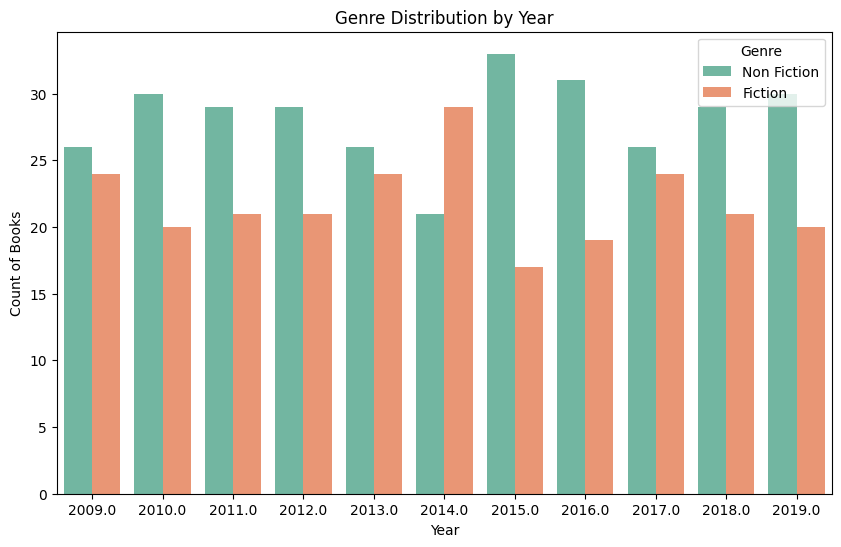

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Year', hue='Genre', palette='Set2')
plt.title('Genre Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count of Books')
plt.show()

The data reveals that the non-fiction genre consistently has more books published than the fiction genre across most years. However, in certain years, the fiction genre surpasses non-fiction, suggesting a potential shift or trend in reader preferences or publisher strategies. This observation implies that publishers should pay attention to these trends and consider the growing demand for fiction books, even if non-fiction books tend to dominate in terms of quantity. This insight could inform future publishing strategies, guiding publishers to adjust their offerings in line with consumer interests and industry trends.

##### 8. Average Reviews by Genre

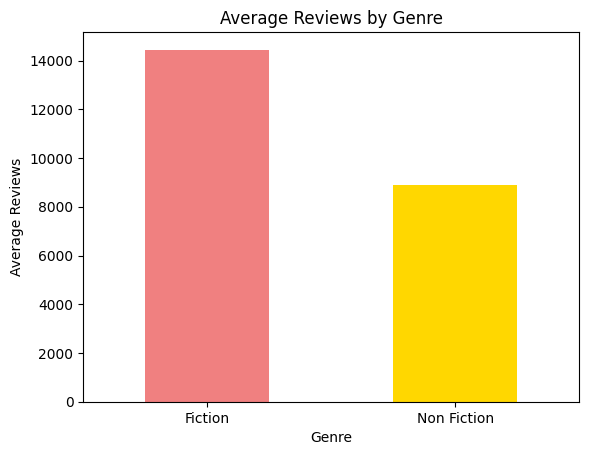

In [16]:
avg_reviews_by_genre = data.groupby('Genre')['Reviews'].mean()
avg_reviews_by_genre.plot(kind='bar', color=['lightcoral', 'gold'])
plt.title('Average Reviews by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Reviews')
plt.xticks(rotation=0)
plt.show()

The data shows that fiction books receive significantly more reviews than non-fiction books, indicating higher levels of discussion and engagement with fiction titles. This suggests that fiction books are more actively talked about, possibly reflecting stronger reader interest or broader appeal. Publishers can leverage these reviews to gain insights into emerging trends and preferences, enabling them to tailor their strategies and book offerings accordingly. By monitoring review patterns, publishers can stay ahead of market demands and align their content with what resonates most with readers.

##### 9.Price Distribution by Genre

/var/folders/c2/snb3yrcs1w38z7qd3r208vch0000gn/T/ipykernel_97234/493455367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='Price', data=data, palette='Set2')


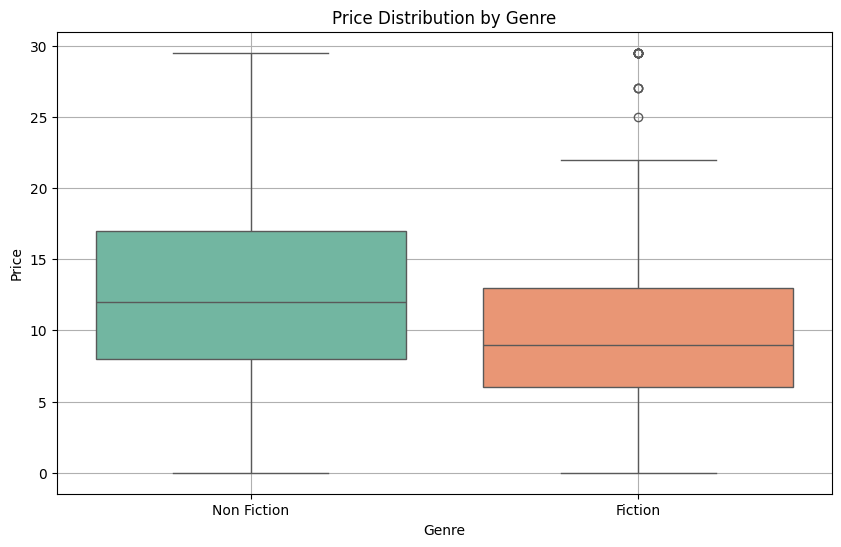

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Price', data=data, palette='Set2')
plt.title('Price Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.grid()
plt.show()

The data indicates that the average price of non-fiction books is higher than that of fiction books, as evidenced by the mean price and overall price distribution. Non-fiction books have a higher mean price (13.47) compared to fiction books (10.43). While there are some outliers in the fiction category where prices exceed those of non-fiction books, these instances may be due to factors such as book length, subject matter, or academic content. Despite these outliers, the general trend shows that non-fiction books tend to be more expensive than fiction, which can guide pricing strategies for publishers.

##### 10. Top 10 Most Reviewed Books

/var/folders/c2/snb3yrcs1w38z7qd3r208vch0000gn/T/ipykernel_97234/584791828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Reviews', y='Name', data=most_reviewed_books, palette='Blues_r')


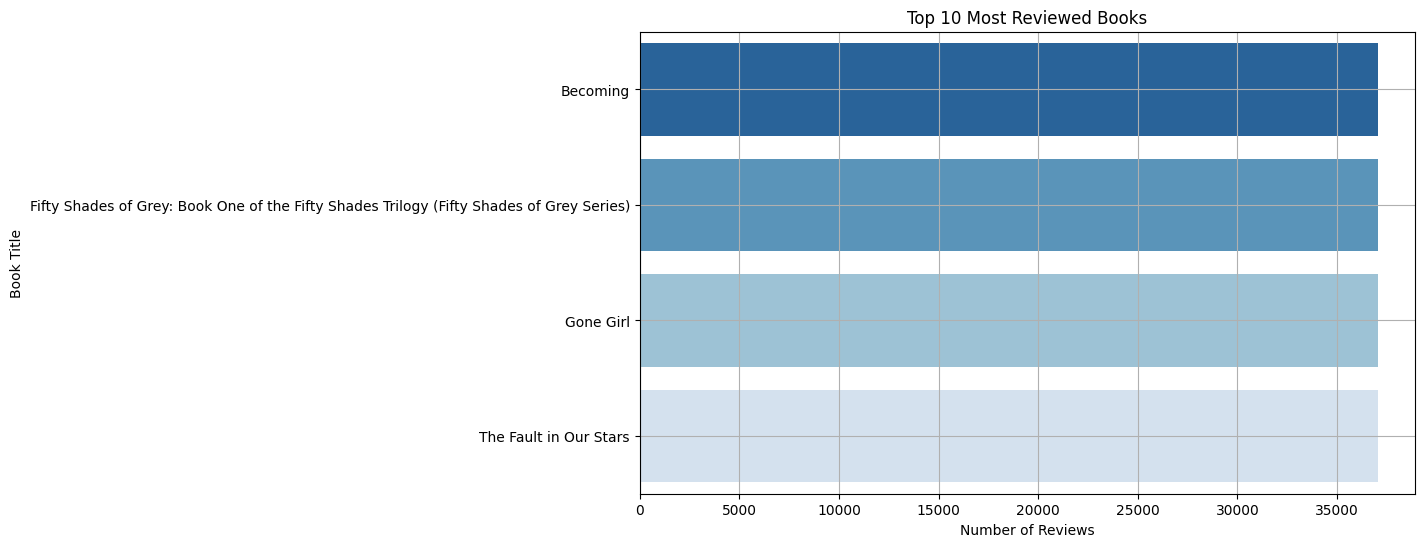

In [18]:
most_reviewed_books = data.nlargest(10, 'Reviews')[['Name', 'Reviews']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Reviews', y='Name', data=most_reviewed_books, palette='Blues_r')
plt.title('Top 10 Most Reviewed Books')
plt.xlabel('Number of Reviews')
plt.ylabel('Book Title')
plt.grid()
plt.show()

The data highlights the top books with the highest number of reviews, indicating their status as bestsellers. For example, titles like Becoming, Fifty Shades of Grey, Gone Girl, and The Fault in Our Stars have a significant number of reviews, suggesting they are widely discussed and purchased. Publishers and customers can use this information to identify popular books. However, it's important to consider external factors that might influence a book’s success, such as movie adaptations or media exposure, which could drive additional sales and increase the volume of reviews. These external influences should be factored into sales strategies and marketing campaigns.